In [105]:
import qiskit as qk
import random
from math import pi
import matplotlib.pyplot as plt
from qiskit import(QuantumCircuit,execute,Aer,IBMQ)
from qiskit.visualization import plot_histogram, plot_state_qsphere
from qiskit.quantum_info import Statevector
from qiskit.providers.aer.noise import NoiseModel

In [106]:
#===================
# Create QML model
#===================
import pennylane as qml_model
from pennylane import numpy as np

#==================================
# Fetch gradient descent optimizer
#==================================
from pennylane.optimize import GradientDescentOptimizer

In [107]:
#===========================================
# Build noise model from backend properties
#===========================================
IBMQ.save_account('0fbdb382eb11ab0fe752ceccce6e05056adafba8b5b0036998ee49a6ff117d799049d633f04529d2c8692710bfd02974e2fa9c3981b9357ccb166452de5b0211')
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_vigo')
noise_model = NoiseModel.from_backend(backend)

configrc.store_credentials:WARNING:2020-09-24 18:38:51,709: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2020-09-24 18:38:52,953: Credentials are already in use. The existing account in the session will be replaced.


In [108]:
#===============================
# Get coupling map from backend
#===============================
coupling_map = backend.configuration().coupling_map

In [109]:
#==================================
# Get basis gates from noise model
#==================================
basis_gates = noise_model.basis_gates

In [110]:
#================
# Creating qubits
#================
q=qk.QuantumRegister(2)

In [111]:
#========================
#Creating Classical Bits
#========================

c=qk.ClassicalRegister(2)
circuit=qk.QuantumCircuit(q,c)

In [112]:
#Target Probabilities
target_probs = np.tensor([0, 0.5, 0.5, 0])

In [113]:
#==================================================
# Rotation Operation Ry along y-axis on first qubit 
#==================================================
theta=random.vonmisesvariate(mu=0, kappa=4)
circuit.ry(30,q[0])

In [114]:
#============================================================================================
#CNOT Gate on the first to the second qubit (Negates second state only if first state is 1)
#============================================================================================
circuit.cx(0,1)

In [115]:
#===================================================
#Rotation Operation Rx along x-axis on second qubit 
#===================================================
circuit.rx(pi,q[1])

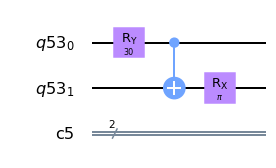

In [116]:
#===============
#Display circuit
#===============
circuit.draw('mpl')

In [117]:
simulator = Aer.get_backend('qasm_simulator')
sv_simulator = Aer.get_backend('statevector_simulator')

In [118]:
#=========================================
#Map quantum measurement to classical bits
#=========================================
circuit.measure(q,c)

In [119]:
#Checking for 1 measurements
# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1,noise_model=noise_model)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 01 and 10 are:",counts)


Total count for 01 and 10 are: {'10': 1}


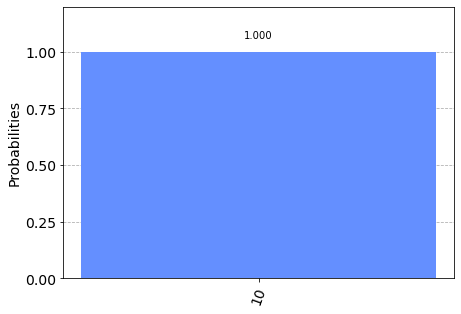

In [120]:
#Histogram of probabilities for 01 and 10 in one measurement
plot_histogram(counts)


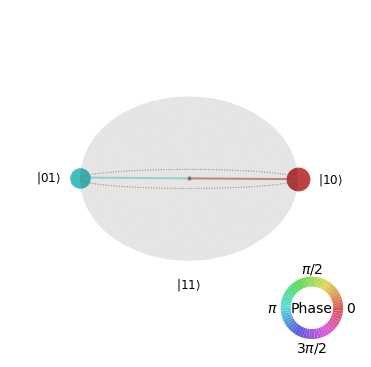

In [121]:
plot_state_qsphere(
    Statevector.from_label('00').evolve(circuit.remove_final_measurements(inplace=False)),
    figsize=(6.5, 6.5)
)

In [122]:
#Checking for 10 measurements
# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=10,noise_model=noise_model)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 01 and 10 are:",counts)


Total count for 01 and 10 are: {'01': 3, '10': 7}


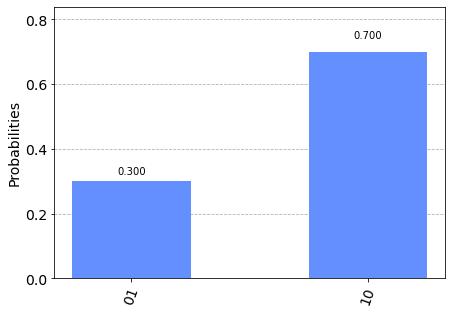

In [123]:
#Histogram of probabilities for 01 and 10 in ten measurements
plot_histogram(counts)

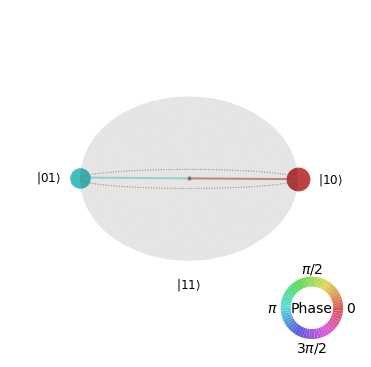

In [124]:
plot_state_qsphere(
    Statevector.from_label('00').evolve(circuit.remove_final_measurements(inplace=False)),
    figsize=(6.5, 6.5)
)

In [125]:
#Checking for 100 measurements
# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=100,noise_model=noise_model)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 01 and 10 are:",counts)


Total count for 01 and 10 are: {'00': 2, '01': 34, '10': 64}


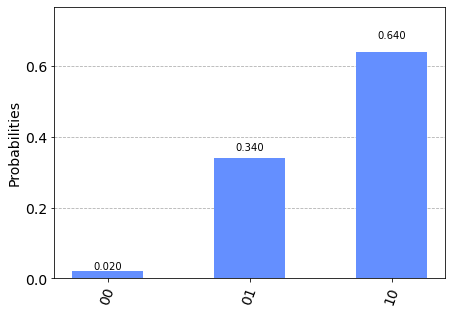

In [126]:
#Histogram of probabilities for 01 and 10 in hundred measurements
plot_histogram(counts)

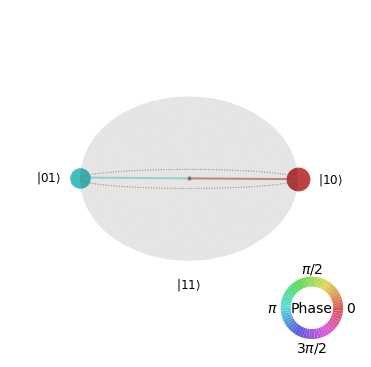

In [127]:
plot_state_qsphere(
    Statevector.from_label('00').evolve(circuit.remove_final_measurements(inplace=False)),
    figsize=(6.5, 6.5)
)

In [128]:
#Checking for 1000 measurements
# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000, noise_model=noise_model)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 01 and 10 are:",counts)


Total count for 01 and 10 are: {'00': 21, '01': 430, '10': 537, '11': 12}


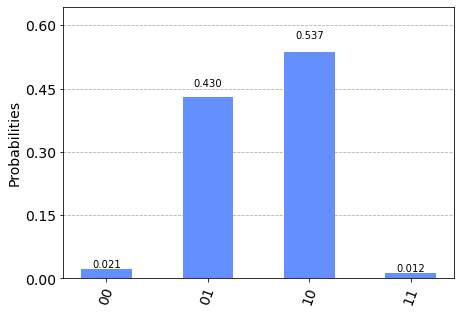

In [129]:
#Histogram of probabilities for 01 and 10 in thousand measurements
plot_histogram(counts)

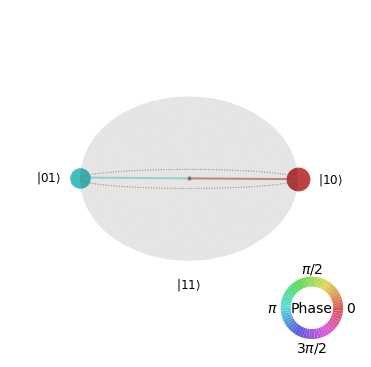

In [130]:
plot_state_qsphere(
    Statevector.from_label('00').evolve(circuit.remove_final_measurements(inplace=False)),
    figsize=(6.5, 6.5)
)